### Data Loading and Exploration and Transformation

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from bokeh.models import ColumnDataSource,HoverTool
from bokeh.plotting import figure, show, output_notebook
from bokeh.io import push_notebook
from bokeh.transform import factor_cmap
from bokeh.palettes import Blues256
output_notebook()

Loading BokehJS ...

In [4]:
#Load the data from the csv file
df_job_posting = pd.read_csv('job_postings.csv')
df_skills = pd.read_csv('job_skills.csv')

In [5]:
#merge csv files
df_job_skill = pd.merge(df_job_posting,df_skills,on='job_link',how='inner')

In [6]:
#Explore the data
print(f"List of the first 5 rows: \n {df_job_skill.head()}")

List of the first 5 rows: 
                                             job_link  \
0  https://www.linkedin.com/jobs/view/senior-mach...   
1  https://www.linkedin.com/jobs/view/principal-s...   
2  https://www.linkedin.com/jobs/view/senior-etl-...   
3  https://www.linkedin.com/jobs/view/senior-data...   
4  https://www.linkedin.com/jobs/view/lead-data-e...   

             last_processed_time   last_status got_summary got_ner  \
0  2024-01-21 08:08:48.031964+00  Finished NER           t       t   
1  2024-01-20 04:02:12.331406+00  Finished NER           t       t   
2  2024-01-21 08:08:31.941595+00  Finished NER           t       t   
3  2024-01-20 15:30:55.796572+00  Finished NER           t       t   
4  2024-01-21 08:08:58.312124+00  Finished NER           t       t   

  is_being_worked                                     job_title  \
0               f              Senior Machine Learning Engineer   
1               f  Principal Software Engineer, ML Accelerators   
2            

In [8]:
print(df_job_skill.columns.to_list())

['job_link', 'last_processed_time', 'last_status', 'got_summary', 'got_ner', 'is_being_worked', 'job_title', 'company', 'job_location', 'first_seen', 'search_city', 'search_country', 'search_position', 'job_level', 'job_type', 'job_skills']


In [13]:
print(f"Summary Statistics : \n {df_job_skill.describe()}")

Summary Statistics : 
                                                  job_link  \
count                                               12217   
unique                                              12217   
top     https://www.linkedin.com/jobs/view/senior-mach...   
freq                                                    1   

                  last_processed_time   last_status got_summary got_ner  \
count                           12217         12217       12217   12217   
unique                           5763             1           1       1   
top     2024-01-19 09:45:09.215838+00  Finished NER           t       t   
freq                             6455         12217       12217   12217   

       is_being_worked             job_title            company  job_location  \
count            12217                 12217              12217         12216   
unique               1                  6484               3947          2049   
top                  f  Senior Data Engineer  Jobs f

In [15]:
print(f"Information about dataset : \n {df_job_skill.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12217 entries, 0 to 12216
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_link             12217 non-null  object
 1   last_processed_time  12217 non-null  object
 2   last_status          12217 non-null  object
 3   got_summary          12217 non-null  object
 4   got_ner              12217 non-null  object
 5   is_being_worked      12217 non-null  object
 6   job_title            12217 non-null  object
 7   company              12217 non-null  object
 8   job_location         12216 non-null  object
 9   first_seen           12217 non-null  object
 10  search_city          12217 non-null  object
 11  search_country       12217 non-null  object
 12  search_position      12217 non-null  object
 13  job_level            12217 non-null  object
 14  job_type             12217 non-null  object
 15  job_skills           12212 non-null  object
dtypes: o

In [17]:
#Check for null values
print(df_job_skill.isnull().sum())

job_link               0
last_processed_time    0
last_status            0
got_summary            0
got_ner                0
is_being_worked        0
job_title              0
company                0
job_location           1
first_seen             0
search_city            0
search_country         0
search_position        0
job_level              0
job_type               0
job_skills             5
dtype: int64


In [19]:
# Replace missing values with empty strings 
df_job_skill['job_skills'] = df_job_skill['job_skills'].fillna('')
# convert job_skills to lists
df_job_skill['job_skills'] = df_job_skill['job_skills'].apply(
    lambda x: [skill.strip() for skill in x.split(',')] if isinstance(x, str) else (x if isinstance(x, list) else [])
)

In [23]:
#Replace the missing value in job_location by "Unknown"
df_job_skill['job_location'] = df_job_skill['job_location'].fillna("Unknown")
print(df_job_skill['job_location'].isnull().sum())

0


In [25]:
#Check for duplicated values
temp_df = df_job_skill.copy()
temp_df['job_skills']= temp_df['job_skills'].apply(tuple)
print(temp_df.duplicated().sum())

0


In [27]:
#Convert dates
df_job_skill['first_seen'] = pd.to_datetime(df_job_skill['first_seen'])
df_job_skill['last_processed_time']=pd.to_datetime(df_job_skill['last_processed_time'])
print(df_job_skill.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12217 entries, 0 to 12216
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   job_link             12217 non-null  object             
 1   last_processed_time  12217 non-null  datetime64[ns, UTC]
 2   last_status          12217 non-null  object             
 3   got_summary          12217 non-null  object             
 4   got_ner              12217 non-null  object             
 5   is_being_worked      12217 non-null  object             
 6   job_title            12217 non-null  object             
 7   company              12217 non-null  object             
 8   job_location         12217 non-null  object             
 9   first_seen           12217 non-null  datetime64[ns]     
 10  search_city          12217 non-null  object             
 11  search_country       12217 non-null  object             
 12  search_position   

In [29]:
#Delete unecessary column
df_job_skill.drop(columns=["got_summary", "got_ner", "is_being_worked", "last_status"],inplace=True)
print(df_job_skill.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12217 entries, 0 to 12216
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   job_link             12217 non-null  object             
 1   last_processed_time  12217 non-null  datetime64[ns, UTC]
 2   job_title            12217 non-null  object             
 3   company              12217 non-null  object             
 4   job_location         12217 non-null  object             
 5   first_seen           12217 non-null  datetime64[ns]     
 6   search_city          12217 non-null  object             
 7   search_country       12217 non-null  object             
 8   search_position      12217 non-null  object             
 9   job_level            12217 non-null  object             
 10  job_type             12217 non-null  object             
 11  job_skills           12217 non-null  object             
dtypes: datetime64[ns, 

#### Top 10 Job Titles (Bokeh)


In [43]:
# Count the occurrences of each unique job title in the 'job_title' column,
# sort them in descending order, and take the top 10 most frequent job titles
top_job_title = df_job_skill['job_title'].value_counts().head(10).reset_index()

# Rename the resulting columns: 
# 'index' becomes 'job_title' and the count becomes 'count'
top_job_title.columns = ['job_title', 'count']

# Print the resulting DataFrame showing the top 10 job titles and how many times they appear
print(top_job_title)

                                   job_title  count
0                       Senior Data Engineer    285
1                        Senior Data Analyst    163
2                              Data Engineer    149
3                      Senior MLOps Engineer    138
4                               Data Analyst    137
5                             Data Scientist    128
6                         Lead Data Engineer    123
7                      Senior Data Scientist    119
8                             Data Architect    111
9  Staff Machine Learning Engineer, Series A    101


In [45]:
# Convert the DataFrame 'top_job_title' into a Bokeh ColumnDataSource
source = ColumnDataSource(data=top_job_title)

# Create a horizontal bar figure (hbar) with job titles on the y-axis
top_job_figure = figure(
    y_range=top_job_title['job_title'],  # Set the job titles as categories on the y-axis
    height=400,                          # Set the height of the figure
    width=800,                           # Set the width of the figure
    title="Top 10 Job Title",           # Title of the chart
    tooltips=[                          # Add tooltips to show data on hover
        ("Number of Posting", "@count") # Show the count when hovering over bars
    ]
)

# Add horizontal bars to the figure
top_job_figure.hbar(
    y='job_title',      # Position of each bar on the y-axis (job titles)
    right='count',      # Length of each bar based on the 'count' value
    height=0.7,         # Thickness of the bars
    source=source       # Use the prepared ColumnDataSource
)

# Set the starting point of the x-axis to 0
top_job_figure.x_range.start = 0

# Remove the horizontal grid lines 
top_job_figure.ygrid.grid_line_color = None

# Add axis labels
top_job_figure.xaxis.axis_label = "Number of posting"
top_job_figure.yaxis.axis_label = "Job Title"

# Display the plot
show(top_job_figure)

#### Jobs by Country (Ploty)

In [48]:
# Count how many job postings there are for each unique country in the 'search_country' column
job_count_by_country = df_job_skill['search_country'].value_counts().reset_index()
# Rename the columns 'index' becomes 'country', and the value counts become 'job_count'
job_count_by_country.columns = ['country','job_count']
job_count_by_country

,country,job_count
0,United States,10291
1,United Kingdom,995
2,Canada,630
3,Australia,301


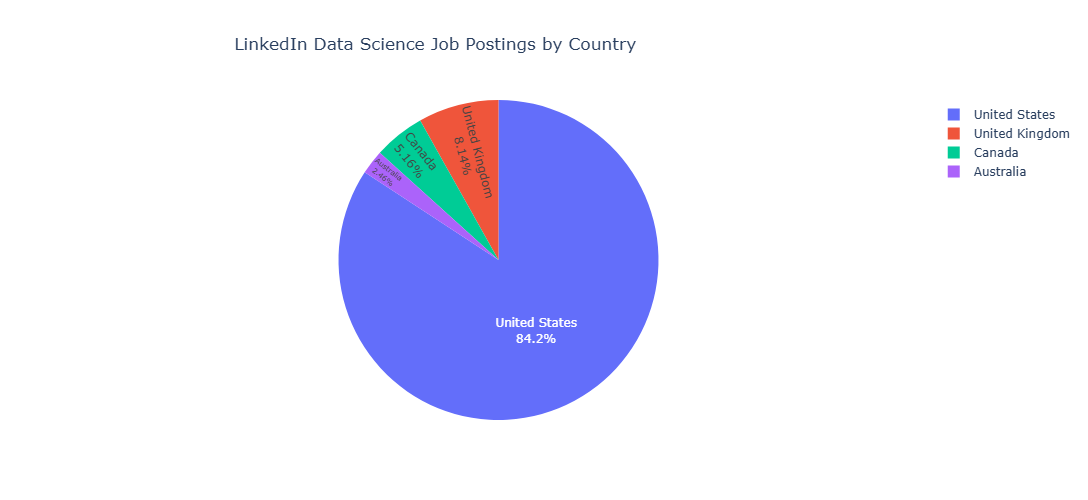

In [52]:
# Create a pie chart using Plotly Express to visualize job postings by country
fig= px.pie(job_count_by_country,
            values='job_count',
            names='country',
            title="LinkedIn Data Science Job Postings by Country")
# Customize how the data is shown inside and on hover
fig.update_traces(
    hovertemplate='%{label}<br>%{percent}',  # Show country name and percentage on hover
    textposition='inside',                   # Place text inside the pie slices
    textinfo='percent+label'                 # Show both percentage and country label on the chart
)

# Adjust the layout size and position of the title
fig.update_layout(
    width=700,       # Set the width of the chart
    height=500,      # Set the height of the chart
    title_x=0.4      # Center the title horizontally 
)
fig.show()

#### Top 10 Hiring Companies (Seaborn)

In [54]:
# Count how many job postings each company has in the 'company' column,
# then take the top 10 companies with the highest number of job postings
top_companies = df_job_skill['company'].value_counts().head(10).reset_index()
top_companies

,company,count
0,Jobs for Humanity,732
1,Recruiting from Scratch,390
2,Dice,193
3,Agoda,172
4,ClearanceJobs,166
5,ClickJobs.io,152
6,Capital One,92
7,Energy Jobline,73
8,Amazon Web Services (AWS),72
9,Deloitte,67


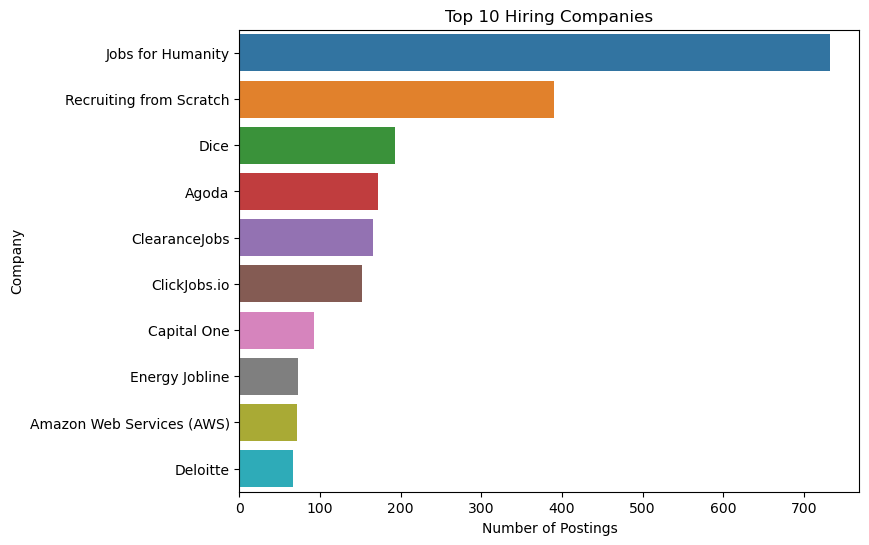

In [99]:
# Set the size of the plot
plt.figure(figsize=(8, 6))
# Create a horizontal bar plot showing the number of job postings by company 
sns.barplot(top_companies,x='count',y='company',hue='company')
# Add title and axis labels
plt.title("Top 10 Hiring Companies")
plt.xlabel("Number of Postings")
plt.ylabel("Company")
# Show the plot
plt.show()

#### Job Posting Trend Over Time (bokeh)

In [58]:
# Count how many job postings were first seen on each date
job_trend = df_job_skill['first_seen'].value_counts().reset_index()

# Rename the columns  'index' becomes 'date', and the count becomes 'count'
job_trend.columns = ['date', 'count']

# Sort the data by date in ascending order
job_trend = job_trend.sort_values('date')
job_trend

,date,count
2,2024-01-12,1722
0,2024-01-13,4946
1,2024-01-14,3194
4,2024-01-15,871
3,2024-01-16,1211
5,2024-01-17,273


In [60]:
# Convert the job_trend DataFrame to a Bokeh ColumnDataSource
source = ColumnDataSource(job_trend)
# Create a new Bokeh figure with a datetime x-axis
p=figure(title="Job Posting Trend Over Time (2024)",x_axis_label='Date',y_axis_label='Number of Job Postings', x_axis_type='datetime',width=800,
    height=400)
# Add a line to the figure to show the number of job postings over time
# 'date' and 'count' are column names from the ColumnDataSource
p.line('date','count',source=source,line_width=2,color='navy')
# Create a HoverTool to show detailed info when hovering over the line
hover = HoverTool(
    tooltips=[
        ("Date", "@date{%F}"),        # %F = Format date as YYYY-MM-DD
        ("Job Count", "@count")
    ],
    formatters={
        "@date": "datetime" #format @date as a datetime
    },
)
# Add the hover tool to the figure
p.add_tools(hover)
# Show the chart
show(p)

#### Top Job Location Canada (Matplotlib)

In [62]:
# Filter the DataFrame to include only job postings where the country is 'Canada'
location_canada = df_job_skill[df_job_skill['search_country']=='Canada']
# Count the number of job postings per job location within Canada,
# then select the top 10 locations with the highest counts
top_location_ca= location_canada['job_location'].value_counts().head(10).reset_index()
# Clean and standardize the location names by replacing full province names and suffixes with abbreviations
top_location_ca['job_location'] = top_location_ca['job_location'].str.replace(r', Canada$', '', regex=True)
top_location_ca['job_location'] = top_location_ca['job_location'].str.replace(r'British Columbia$', 'BC', regex=True)
top_location_ca['job_location'] = top_location_ca['job_location'].str.replace(r'Ontario$', 'ON', regex=True)
top_location_ca['job_location'] = top_location_ca['job_location'].str.replace(r'Quebec$', 'QC', regex=True)
top_location_ca['job_location'] = top_location_ca['job_location'].str.replace(r'Alberta$', 'AB', regex=True)
top_location_ca['job_location'] = top_location_ca['job_location'].str.replace(r'Nova Scotia$', 'NS', regex=True)
top_location_ca

,job_location,count
0,"Toronto, ON",135
1,"Montreal, QC",62
2,"Calgary, AB",53
3,"Vancouver, BC",44
4,"Mississauga, ON",27
5,"Ottawa, ON",19
6,"Edmonton, AB",17
7,"Halifax, NS",15
8,"Waterloo, ON",11
9,"Québec, QC",9


In [64]:
# Create a dictionary mapping city names with province abbreviations to their latitude and longitude coordinates
city_coords = {
    "Toronto, ON": (43.65107, -79.347015),
    "Montreal, QC": (45.50169, -73.567253),
    "Calgary, AB": (51.04473, -114.07188),
    "Vancouver, BC": (49.28273, -123.120735),
    "Mississauga, ON": (43.58905, -79.64412),
    "Ottawa, ON": (45.42153, -75.69719),
    "Edmonton, AB": (53.54612, -113.49382),
    "Halifax, NS": (44.64876, -63.57532),
    "Waterloo, ON": (43.46426, -80.52041),
    "Québec, QC": (46.81388, -71.20798)
}
# Add a new column 'lat' to top_location_ca by mapping each job_location to its latitude.
# If the job_location is not found in city_coords, return None.
top_location_ca["lat"] = top_location_ca["job_location"].map(lambda x: city_coords.get(x, (None, None))[0])
#Add a new column 'lon' for longitude, mapping each job_location to its longitude.
top_location_ca["lon"] = top_location_ca["job_location"].map(lambda x: city_coords.get(x, (None, None))[1])

top_location_ca

,job_location,count,lat,lon
0,"Toronto, ON",135,43.65107,-79.347015
1,"Montreal, QC",62,45.50169,-73.567253
2,"Calgary, AB",53,51.04473,-114.071880
3,"Vancouver, BC",44,49.28273,-123.120735
4,"Mississauga, ON",27,43.58905,-79.644120
5,"Ottawa, ON",19,45.42153,-75.697190
6,"Edmonton, AB",17,53.54612,-113.493820
7,"Halifax, NS",15,44.64876,-63.575320
8,"Waterloo, ON",11,43.46426,-80.520410
9,"Québec, QC",9,46.81388,-71.207980


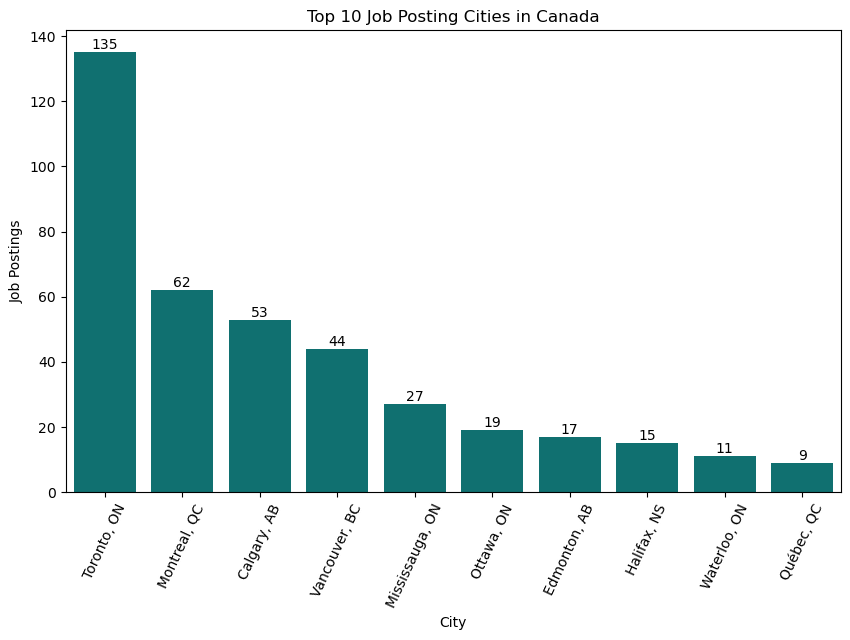

In [68]:
#Top 10 Job Posting Cities in Canadabarplot
# Set the figure size 
plt.figure(figsize=(10,6))
#Draw a barplot using seaborn
plot=sns.barplot(data=top_location_ca,x='job_location',y='count',color='teal')
# Add labels above each bar showing the exact count of job postings
for p in plot.patches:
    height= p.get_height()  # Get the height of each bar (the count)
    plot.text(
        p.get_x() + p.get_width()/2, # X position: center of the bar
        height,  # Y position: top of the bar
        f'{int(height)}', # Text displayed : the count as an integer
        ha='center', va='bottom' # Horizontal alignment: center, Vertical alignment: bottom
    )
# Set the plot title and axis labels    
plt.title('Top 10 Job Posting Cities in Canada')
plt.xlabel('City')
plt.ylabel('Job Postings')
# Rotate x-axis labels by 65 degrees for better readability
plt.xticks(rotation=65)
#show the plot
plt.show()

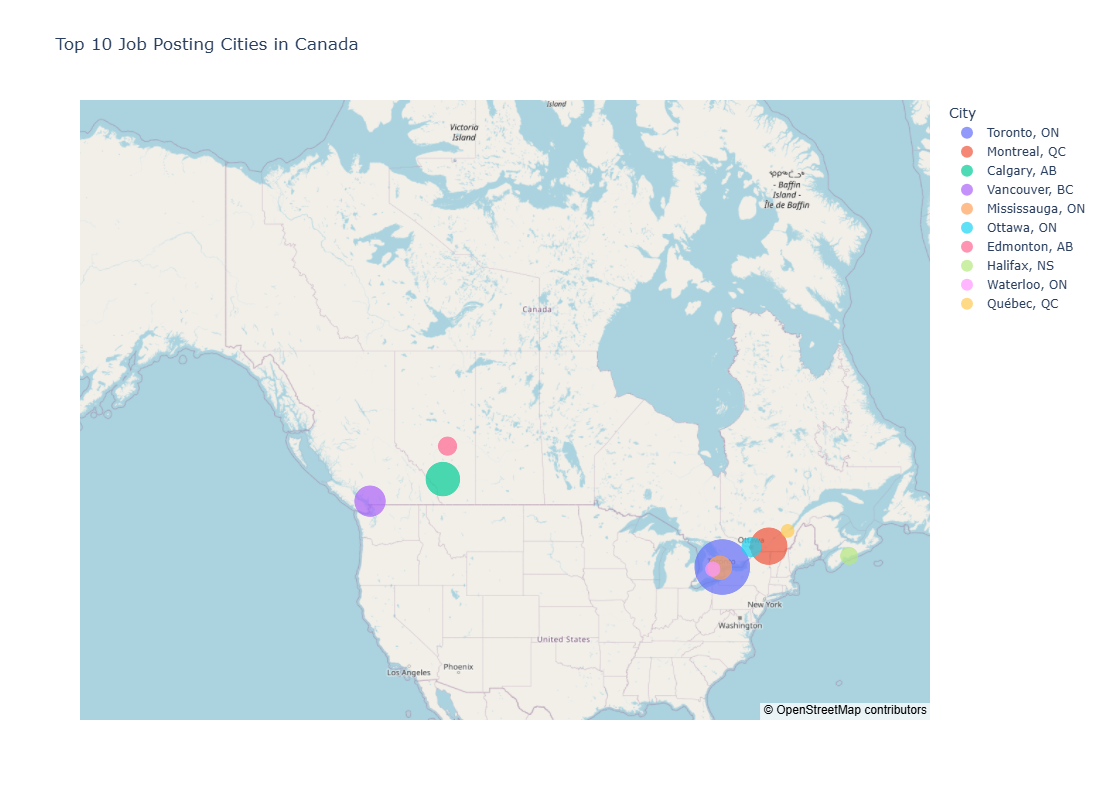

In [72]:
#Top 10 Job Posting Cities in Canada Maps
fig_map = px.scatter_mapbox(
    top_location_ca,
    lat="lat",
    lon="lon",
    size="count",
    color="job_location",
    hover_name="job_location",
    hover_data={"lat": False, "lon": False, "job_location": False},
    size_max=40,
    zoom=2.5,
    title="Top 10 Job Posting Cities in Canada",
    mapbox_style="open-street-map",
    width=1000,   
    height=800,   
    labels={
        "job_location": "City",
        "count":"Job Postings"
           }
)
fig_map.update_layout(
    mapbox_center={"lat": 56.1304, "lon": -106.3468},
    title="Top 10 Job Posting Cities in Canada"
)
fig_map.show()

#### Most In-Demand Skills

In [74]:
#create a subset df with job_level and job_skills
df_job_skills_subset = df_job_skill[['job_level','job_skills']]
#Explode the job_skills into rows
df_exploded = df_job_skills_subset.explode('job_skills')
#group by job_level
skill_by_level_count = df_exploded.groupby('job_level')['job_skills'].value_counts().rename('count').reset_index()
#gest top 10 skill by level
top_skill_by_level = skill_by_level_count.groupby('job_level').head(10).reset_index()
print(top_skill_by_level)


    index   job_level          job_skills  count
0       0   Associate                 SQL    462
1       1   Associate              Python    399
2       2   Associate       Communication    289
3       3   Associate       Data Analysis    282
4       4   Associate             Tableau    208
5       5   Associate  Data Visualization    177
6       6   Associate    Machine Learning    162
7       7   Associate                   R    160
8       8   Associate            Teamwork    155
9       9   Associate       Data analysis    146
10  12517  Mid senior              Python   4402
11  12518  Mid senior                 SQL   4144
12  12519  Mid senior       Communication   2209
13  12520  Mid senior       Data Analysis   1899
14  12521  Mid senior    Machine Learning   1804
15  12522  Mid senior                 AWS   1636
16  12523  Mid senior             Tableau   1477
17  12524  Mid senior  Data Visualization   1385
18  12525  Mid senior                   R   1382
19  12526  Mid senio

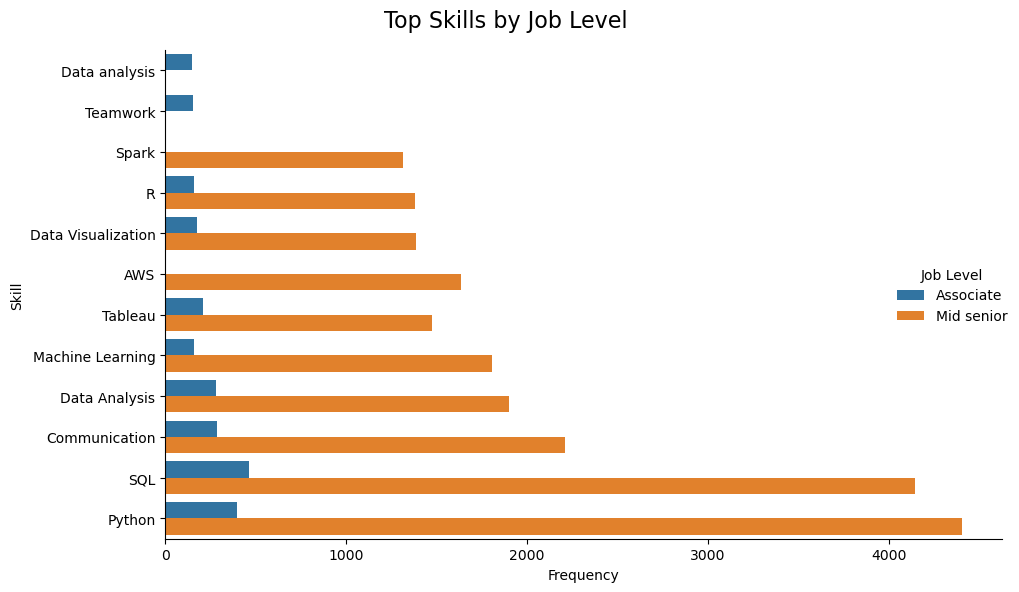

In [76]:
# Sort by total count of each skill
sorted_skills = (
    top_skill_by_level.groupby("job_skills")["count"]
    .sum()
    .sort_values(ascending=True)
    .index
)
# Create a categorical bar plot using seaborn's catplot
graph=sns.catplot(
    data=top_skill_by_level,
    x='count',
    y='job_skills',
    hue='job_level',
    kind='bar',
    height=6, 
    aspect =1.5,
    order=sorted_skills
)
# Set the title of the figure
graph.fig.suptitle('Top Skills by Job Level', fontsize=16)
graph.set_axis_labels("Frequency", "Skill")
# Set the legend title for job levels
graph._legend.set_title("Job Level")
# Adjust layout so labels and title don't overlap
plt.tight_layout()
#show the plot
plt.show()